In [212]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
%%HTML
<style type="text/css">
table.dataframe td, table.dataframe th {
    border: 1px  black solid !important;
  color: black !important;
}

### Generate random data

In [3]:
lang = ["English", "French", "English", "Punjabi", "English", "Mandarin", "English","French", "English", \
        "German", "Spanish","Punjabi","Mandarin","French","English", "English", "French", "English", "English", \
        "Mandarin", "English", "French", "French", "English", "English" ]
len(lang)

25

In [4]:
df = pd.DataFrame()
df["language"] = lang*6
df["temperature"] = np.round(np.random.normal(15,10,150), 2)
df["income"] = np.random.normal(50000,20000,150)
df["income"] = df["income"].apply(lambda x: np.round(abs(x)))
df_ed = pd.DataFrame(index=df.index)
df_ed["precipitation"] = ["low", "moderate", "high","moderate","moderate","high", "moderate", "moderate", "low", "high"]*15
ind = np.random.permutation(df_ed.shape[0])
df_ed = df_ed.iloc[ind,:]
df["precipitation"] = df_ed["precipitation"]

In [5]:
ind = np.random.permutation(df.shape[0])
df = df.iloc[ind,:]
df.head()

,language,temperature,income,precipitation
144,Mandarin,25.22,60247.0,moderate
55,Mandarin,-1.93,65059.0,high
50,English,4.21,76721.0,low
11,Punjabi,0.13,68935.0,moderate
53,Punjabi,12.41,53601.0,moderate


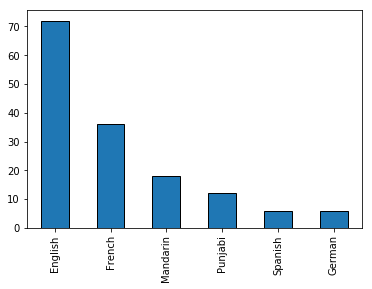

In [16]:
df["language"].value_counts().plot(kind="bar", ec="k")

(array([ 2.,  3.,  6., 14., 29., 32., 32., 18.,  9.,  5.]),
 array([-17.63 , -11.882,  -6.134,  -0.386,   5.362,  11.11 ,  16.858,
         22.606,  28.354,  34.102,  39.85 ]),
 <a list of 10 Patch objects>)

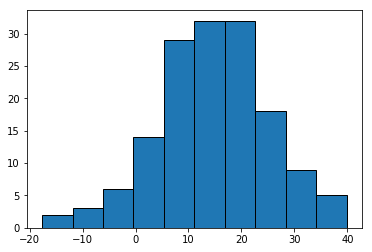

In [213]:
plt.hist(df.temperature, ec="k")

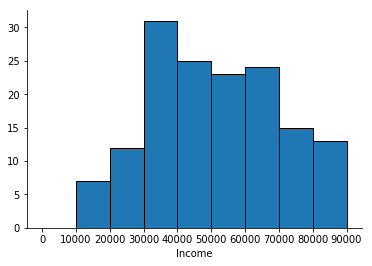

In [23]:
bins = np.arange(0, 100000, 10000)
plt.hist(df.income, bins=bins, ec="k")
plt.xticks(bins);
ax = plt.gca()
ax.set_xlabel("Income")
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

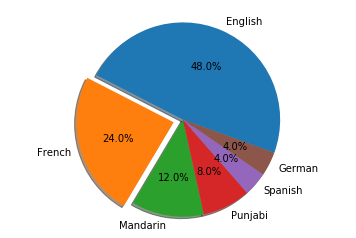

In [22]:
explode = (0, 0.1, 0, 0, 0, 0)
df["language"].value_counts().plot(kind="pie", explode=explode, startangle=340, shadow=True, autopct='%1.1f%%' )
ax = plt.gca()
ax.axis('equal')
ax.set_ylabel("");

In [201]:
df.reset_index().head()
df = df.reset_index().drop("index", axis=1)
df = df[['temperature', "precipitation", 'language', 'income' ]]

pd.set_option('display.max_rows', 6)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

df

,temperature,precipitation,language,income
0,25.22,moderate,Mandarin,60247.0
1,-1.93,high,Mandarin,65059.0
2,4.21,low,English,76721.0
...,...,...,...,...
147,17.69,high,English,47874.0
148,19.53,high,English,76346.0
149,19.85,high,English,32809.0


### Frequency Distribution Table

In [202]:
ft = pd.DataFrame(df.language.value_counts())
ft.columns = ["frequency"]
ft

,frequency
English,72
French,36
Mandarin,18
Punjabi,12
Spanish,6
German,6


In [204]:
tot = ft.frequency.sum()
ft["percentage"] = ft.frequency.apply(lambda x: round(x*100/tot,2))
ft["cumulative_percentage"] = ft.percentage.cumsum()
ft

,frequency,percentage,cumulative_percentage
English,72,48.0,48.0
French,36,24.0,72.0
Mandarin,18,12.0,84.0
Punjabi,12,8.0,92.0
Spanish,6,4.0,96.0
German,6,4.0,100.0


### Random data used for measures of dispersion

In [206]:
df1 = pd.DataFrame()
df1["Variable A"] = np.round(np.random.normal(75, 5, 10),0)
df1["Variable B"] = np.round(np.random.normal(75, 20, 10),0)
df1

,Variable A,Variable B
0,80.0,71.0
1,75.0,45.0
2,69.0,123.0
...,...,...
7,64.0,72.0
8,73.0,87.0
9,76.0,87.0


In [207]:
# Adjusting the values to make the measures of central tendency simiilar
a = df1["Variable A"]
b = df1["Variable B"]
b[4] = 74
b[6] = 74
b[1] = 74
b[8] = 95
b[0] = 20
b[7] = 130

In [209]:
dfn = pd.DataFrame()
dfn["Variable A"] =a
dfn["Variable B"] = b

In [210]:
dfn

,Variable A,Variable B
0,80.0,20.0
1,75.0,74.0
2,69.0,123.0
...,...,...
7,64.0,130.0
8,73.0,95.0
9,76.0,87.0


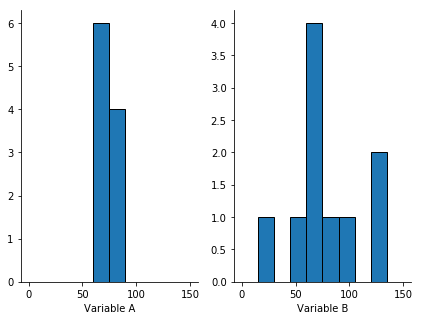

In [211]:
fig, axes = plt.subplots(1,2,figsize=(7,5))
axes[0].hist(dfn["Variable A"], ec="k", range=[0,150],bins=10)
axes[0].set_xlabel("Variable A")
axes[0].spines['right'].set_visible(False)
axes[0].spines['top'].set_visible(False)

axes[1].hist(dfn["Variable B"], ec="k",  range=[0,150],bins=10)
axes[1].set_xlabel("Variable B")
axes[1].spines['right'].set_visible(False)
axes[1].spines['top'].set_visible(False)

### Mean

In [164]:
dfn["Variable A"].mean()

74.2

In [165]:
dfn["Variable B"].mean()

74.0

### Mode

In [166]:
stats.mode(dfn["Variable A"])

ModeResult(mode=array([73.]), count=array([2]))

In [167]:
stats.mode(dfn["Variable B"])

ModeResult(mode=array([74.]), count=array([3]))

### Median

In [170]:
np.median(dfn["Variable A"])

74.5

In [171]:
np.median(dfn["Variable B"])

74.0

### Range

In [176]:
dfn["Variable A"].max() - dfn["Variable A"].min()

13.0

In [177]:
dfn["Variable B"].max() - dfn["Variable B"].min()

110.0

### Box plot

Text(0.5, 0, 'Variable B')

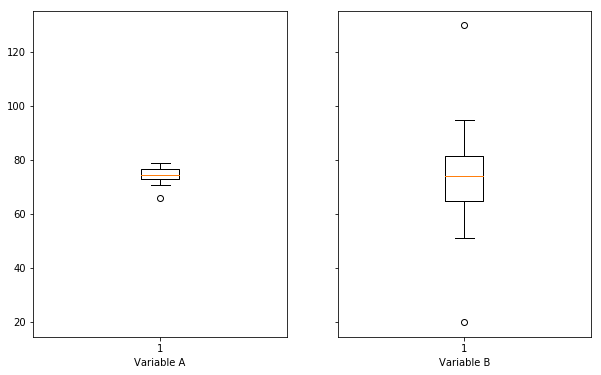

In [195]:
fig, axes = plt.subplots(1,2,figsize=(10,6), sharey=True)
box_A = axes[0].boxplot(dfn["Variable A"])
axes[0].set_xlabel("Variable A")

box_B = axes[1].boxplot(dfn["Variable B"])
axes[1].set_xlabel("Variable B")

### Interquartile Range

In [198]:
stats.iqr(dfn["Variable A"])

3.75

In [199]:
stats.iqr(dfn["Variable B"])

16.5

### Variance

In [191]:
np.var(dfn["Variable A"])

12.960000000000003

In [192]:
np.var(dfn["Variable B"])

725.6

### Standard Deviation

In [193]:
np.std(dfn["Variable A"])

3.6000000000000005

In [194]:
np.std(dfn["Variable B"])

26.93696345173301